#### %matplotlib inline


# Color Quantization using K-Means

Performs a pixel-wise Vector Quantization (VQ) of an image of the summer palace
(China), reducing the number of colors required to show the image from 96,615
unique colors to 64, while preserving the overall appearance quality.

In this example, pixels are represented in a 3D-space and K-means is used to
find 64 color clusters. In the image processing literature, the codebook
obtained from K-means (the cluster centers) is called the color palette. Using
a single byte, up to 256 colors can be addressed, whereas an RGB encoding
requires 3 bytes per pixel. The GIF file format, for example, uses such a
palette.

For comparison, a quantized image using a random codebook (colors picked up
randomly) is also shown.


Fitting model on a small sub-sample of the data
done in 0.365s.
Predicting color indices on the full image (k-means)
done in 0.074s.
Predicting color indices on the full image (random)
done in 0.221s.


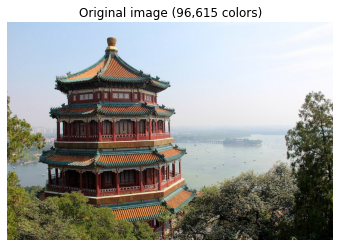

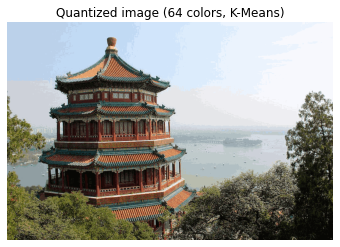

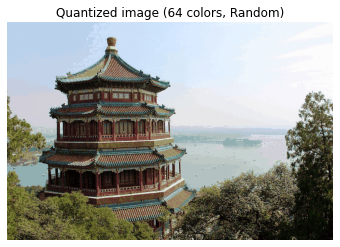

In [1]:
# Authors: Robert Layton <robertlayton@gmail.com>
#          Olivier Grisel <olivier.grisel@ensta.org>
#          Mathieu Blondel <mathieu@mblondel.org>
#
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle
from time import time
import pickle

n_colors = 64
base_results = []

# Load the Summer Palace photo
china = load_sample_image("china.jpg")

# Convert to floats instead of the default 8 bits integer coding. Dividing by
# 255 is important so that plt.imshow behaves works well on float data (need to
# be in the range [0-1])
china = np.array(china, dtype=np.float64) / 255

# Load Image and transform to a 2D numpy array.
w, h, d = original_shape = tuple(china.shape)
assert d == 3
image_array = np.reshape(china, (w * h, d))

print("Fitting model on a small sub-sample of the data")
t0 = time()
image_array_sample = shuffle(image_array, random_state=0, n_samples=1_000)
kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(image_array_sample)
base_results.append(time() - t0)
#print(f"done in {time() - t0:0.3f}s.")
print(f"done in {base_results[0]:0.3f}s.")

# Get labels for all points
print("Predicting color indices on the full image (k-means)")
t0 = time()
labels = kmeans.predict(image_array)
base_results.append(time() - t0)
#print(f"done in {time() - t0:0.3f}s.")
print(f"done in {base_results[1]:0.3f}s.")


codebook_random = shuffle(image_array, random_state=0, n_samples=n_colors)
print("Predicting color indices on the full image (random)")
t0 = time()
labels_random = pairwise_distances_argmin(codebook_random, image_array, axis=0)
base_results.append(time() - t0)
#print(f"done in {time() - t0:0.3f}s.")
print(f"done in {base_results[2]:0.3f}s.")


def recreate_image(codebook, labels, w, h):
    """Recreate the (compressed) image from the code book & labels"""
    return codebook[labels].reshape(w, h, -1)


# Display all results, alongside original image
plt.figure(1)
plt.clf()
plt.axis("off")
plt.title("Original image (96,615 colors)")
plt.imshow(china)

plt.figure(2)
plt.clf()
plt.axis("off")
plt.title(f"Quantized image ({n_colors} colors, K-Means)")
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))

plt.figure(3)
plt.clf()
plt.axis("off")
plt.title(f"Quantized image ({n_colors} colors, Random)")
plt.imshow(recreate_image(codebook_random, labels_random, w, h))
plt.show()

with open('base_results.pkl', 'wb') as f:
    pickle.dump(base_results, f)

### With Optimized Sklearn
##### change to optimized kernels and routines

In [1]:
from sklearnex import patch_sklearn
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


Fitting model on a small sub-sample of the data
done in 0.253s.
Predicting color indices on the full image (k-means)
done in 0.009s.
Predicting color indices on the full image (random)
done in 0.207s.


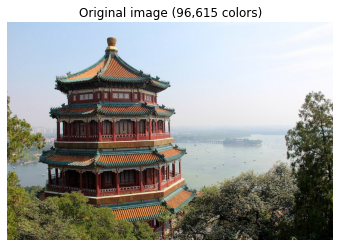

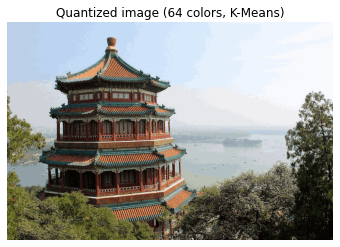

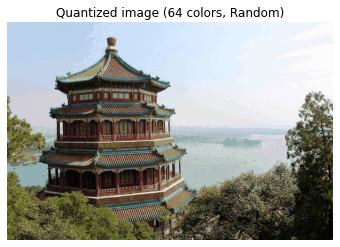

In [2]:
# Authors: Robert Layton <robertlayton@gmail.com>
#          Olivier Grisel <olivier.grisel@ensta.org>
#          Mathieu Blondel <mathieu@mblondel.org>
#
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle
from time import time

n_colors = 64
opt_results = []

# Load the Summer Palace photo
china = load_sample_image("china.jpg")

# Convert to floats instead of the default 8 bits integer coding. Dividing by
# 255 is important so that plt.imshow behaves works well on float data (need to
# be in the range [0-1])
china = np.array(china, dtype=np.float64) / 255

# Load Image and transform to a 2D numpy array.
w, h, d = original_shape = tuple(china.shape)
assert d == 3
image_array = np.reshape(china, (w * h, d))

print("Fitting model on a small sub-sample of the data")
t0 = time()
image_array_sample = shuffle(image_array, random_state=0, n_samples=1_000)
kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(image_array_sample)
opt_results.append(time() - t0)
#print(f"done in {time() - t0:0.3f}s.")
print(f"done in {opt_results[0]:0.3f}s.")

# Get labels for all points
print("Predicting color indices on the full image (k-means)")
t0 = time()
labels = kmeans.predict(image_array)
opt_results.append(time() - t0)
#print(f"done in {time() - t0:0.3f}s.")
print(f"done in {opt_results[1]:0.3f}s.")


codebook_random = shuffle(image_array, random_state=0, n_samples=n_colors)
print("Predicting color indices on the full image (random)")
t0 = time()
labels_random = pairwise_distances_argmin(codebook_random, image_array, axis=0)
opt_results.append(time() - t0)
#print(f"done in {time() - t0:0.3f}s.")
print(f"done in {opt_results[2]:0.3f}s.")


def recreate_image(codebook, labels, w, h):
    """Recreate the (compressed) image from the code book & labels"""
    return codebook[labels].reshape(w, h, -1)


# Display all results, alongside original image
plt.figure(1)
plt.clf()
plt.axis("off")
plt.title("Original image (96,615 colors)")
plt.imshow(china)

plt.figure(2)
plt.clf()
plt.axis("off")
plt.title(f"Quantized image ({n_colors} colors, K-Means)")
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))

plt.figure(3)
plt.clf()
plt.axis("off")
plt.title(f"Quantized image ({n_colors} colors, Random)")
plt.imshow(recreate_image(codebook_random, labels_random, w, h))
plt.show()

### Plot results

In [3]:
import pickle
import matplotlib.pyplot as plt

with open('base_results.pkl', 'rb') as f:
    base_results=pickle.load(f)

mfit = [ base_results[0], opt_results[0]]
kmeans = [ base_results[1], opt_results[1]]
random = [ base_results[2], opt_results[2]]



In [4]:
from matplotlib import pyplot as plt

def plot_results(plot_title, data):

    # Add title and axis names
    plt.title(plot_title)
    plt.xlabel('experiment')
    plt.ylabel('values')

    # Set the figure size
    plt.rcParams["figure.figsize"] = [7.00, 3.50]
    plt.rcParams["figure.autolayout"] = True

    # List of data points
    x_axes = [0, 1]

    # Plot bar chart with data points
    plt.bar(x_axes, data, color=['orange','blue'])
    #title=['base', 'intel - '+str(data[0]/data[1]):0.3f]
    title=['base', f"intel - {data[0]/data[1]:0.2f}X"]
    for x, y, t in zip(x_axes, data, title):
        plt.text(x, y+0.01, t)

    # Display the plot
    plt.show()

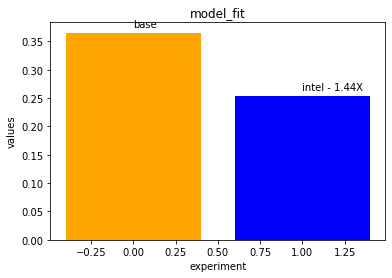

In [5]:
plot_results('model_fit', mfit)

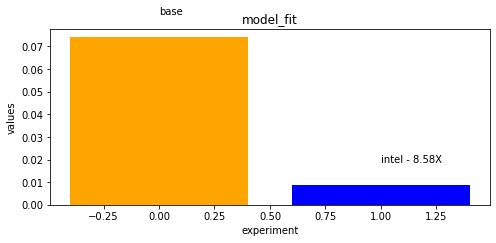

In [6]:
plot_results('model_fit', kmeans)

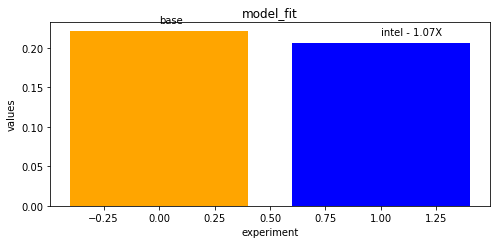

In [7]:
plot_results('model_fit', random)